Word Embedding is a language model to represent words in a numerical way. It belongs to the family of vector space model (VSM) to map vocabulary to vectors. <p> Word embedding uses the machine learning approach to learn the numeric representation for text where it capture the context of the word in a document, semantic and syntactic similarity as well as relation between other words in corpus.
One problem of VSM with binary encoding is that the binary vector cannot easily measure the relationship between words mathematically. Word2Vec is a shallow neural network (usually 2 hidden layers) to generate word embedding by training the model on a supervised manner to measure semantic and syntactic similarities between words. Word2vec can combine or group the vectors of similar words in vector space to measure the similarities mathematically. It creates vectors whose numerical distribution represents the word features or the context of individual words without human intervention. These estimates can be used to determine a word’s relationship to other words (for example, “man” is to “boy” what “woman” is to “girl”), or to group and categorize papers by topic. <p>
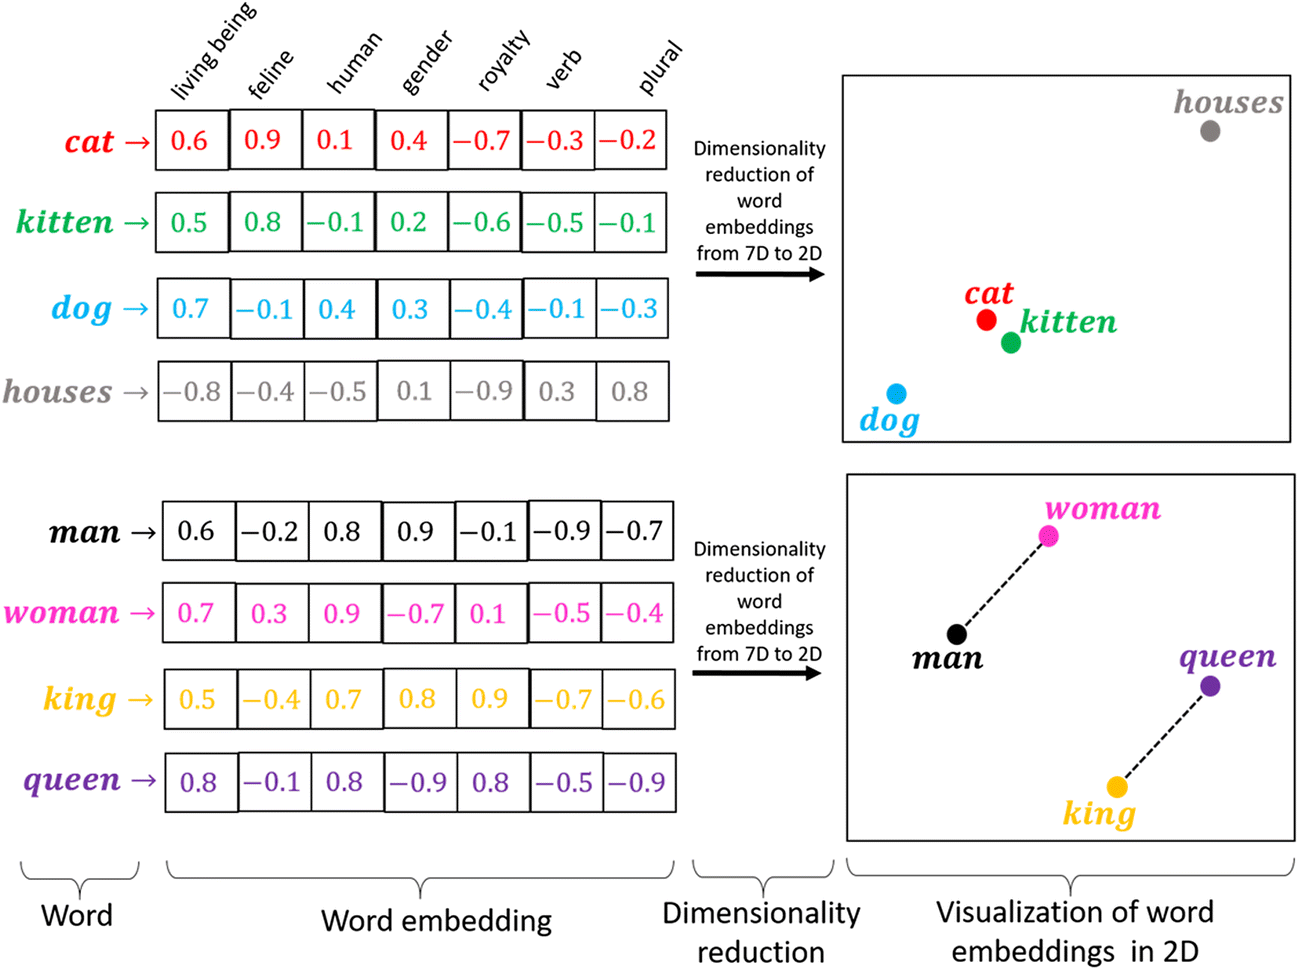
In domains as diverse as scientific research, legal discovery, e-commerce, and customer relationship management, these clusters can be used to power search, sentiment analysis, and recommendations.

The Word2vec neural network produces a vocabulary with each item having its vector, which may be fed into a deep-learning network or simply queried to find word associations. It usually has two architectures: <p>
# Continuous Bag of Words (CBOW) <p>
CBOW model predicts the current word given context words within a specific window. In the CBOW model, the input layer contains the context words and the output layer contains the current word. The number of dimensions representing the current word at the output layer is stored in the hidden layer. <p>
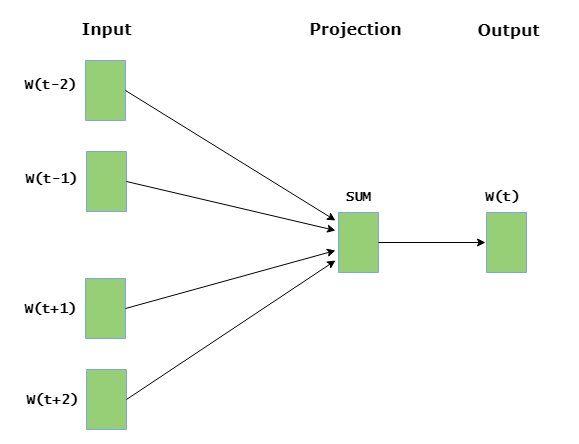

# Skip Gram model
Given the current word, Skip-gram model estimates the surrounding context words within a certain window. The current word is in the input layer, while the context words are in the output layer. The number of dimensions in which we wish to represent the current word existing at the input layer is stored in the hidden layer. <p>
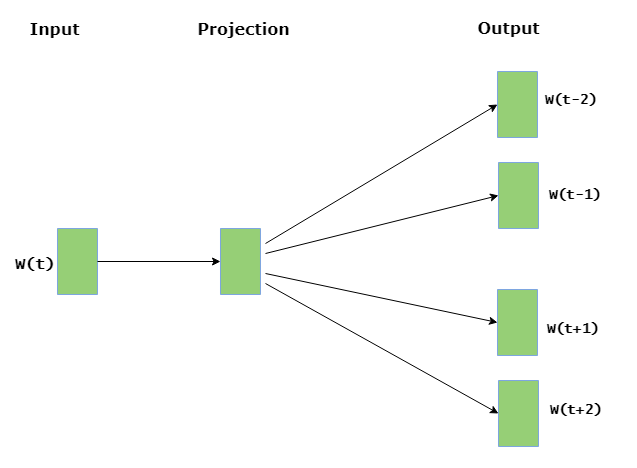

The basic idea behind word embedding is that the words occuring in similar contexts tend to be closer to each other in vector space. We can use the Python package nltk and gensim to generate these word vectors.

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Get the Amazon fine food review dataset

In [2]:
!wget https://storage.googleapis.com/pet-detect-239118/text_retrieval/Reviews.csv.zip Reviews.csv.zip

--2022-06-01 13:27:50--  https://storage.googleapis.com/pet-detect-239118/text_retrieval/Reviews.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 172.253.117.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120062355 (114M) [application/x-zip-compressed]
Saving to: ‘Reviews.csv.zip’

Reviews.csv.zip     100%[===================>] 114.50M   135MB/s    in 0.9s    

2022-06-01 13:27:51 (135 MB/s) - ‘Reviews.csv.zip’ saved [120062355/120062355]

--2022-06-01 13:27:51--  http://reviews.csv.zip/
Resolving reviews.csv.zip (reviews.csv.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘reviews.csv.zip’
FINISHED --2022-06-01 13:27:51--
Total wall clock time: 1.2s
Downloaded: 1 files, 114M in 0.9s (135 MB/s)


Unzip the file

In [3]:
from zipfile import ZipFile
file_name = '/content/Reviews.csv.zip'

with ZipFile(file_name, 'r',) as zip:
  zip.extractall()
  print('Done!!')

Done!!


In [4]:
rev = pd.read_csv('Reviews.csv')
rev.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Check missing data

In [5]:
rev[['Text']].isna().sum()

Text    0
dtype: int64

In [6]:
from gensim.parsing.preprocessing import preprocess_documents

text_corpus = rev['Text'].values

# the review text in numpy array
text_corpus.shape

(568454,)

In [7]:
# get the tokens in list of lists
clean_corpus = preprocess_documents(text_corpus)

In [8]:
dictionary = gensim.corpora.Dictionary(clean_corpus)

In [16]:
import multiprocessing
cores= multiprocessing.cpu_count()

Use Gensim to build word2Vec model <p>
arguments:


*   sentences - the target clean text we use to train the word2Vec 
*   min_count - Ignore all the words where frequency of each word is less than the defined value, the default value is 5. We want to add all words in corpus, so value we provided is 1.
*   size - # of dimensions of the vector form of each word, by default size is 100
*   sg - Used to choose the training algorithm: 1 for skip-gram; 0 for CBOW. By default CBOW is used for training.


In [19]:
# build CBOW model -- optimize by 5 epochs
model_cbow = gensim.models.Word2Vec(min_count = 1, workers=cores, size = 200, window = 6, sg=0, iter = 5)

In [20]:
model_cbow.build_vocab(clean_corpus)

In [24]:
model_cbow.wv.vocab.keys()

dict_keys(['bought', 'vital', 'can', 'dog', 'food', 'product', 'good', 'qualiti', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'labrador', 'finicki', 'appreci', 'arriv', 'label', 'jumbo', 'salt', 'peanut', 'actual', 'small', 'size', 'unsalt', 'sure', 'error', 'vendor', 'intend', 'repres', 'confect', 'centuri', 'light', 'pillowi', 'citru', 'gelatin', 'nut', 'case', 'filbert', 'cut', 'tini', 'squar', 'liber', 'coat', 'powder', 'sugar', 'mouth', 'heaven', 'chewi', 'flavor', 'highli', 'recommend', 'yummi', 'treat', 'familiar', 'stori', 'lewi', 'lion', 'witch', 'wardrob', 'seduc', 'edmund', 'sell', 'brother', 'sister', 'secret', 'ingredi', 'robitussin', 'believ', 'got', 'addit', 'root', 'beer', 'extract', 'order', 'cherri', 'soda', 'medicin', 'great', 'taffi', 'price', 'wide', 'assort', 'deliveri', 'quick', 'lover', 'deal', 'wild', 'hair', 'pound', 'bag', 'enjoy', 'watermelon', 'melon', 'peppermint', 'grape', 'complaint', 'bit', 'red', 'black', 'licoric', 'piec', 'particula

Check the vocabulary size

In [25]:
#vocab size
len(model_cbow.wv.vocab.keys())

93736

In [27]:
# train the CBOW Word2Vec
model_cbow.train(clean_corpus,total_examples=model_cbow.corpus_count,epochs=20)

(349353719, 385684380)

In [29]:
# save the trained model
path_string = 'CBOW.model'
model_cbow.save(path_string)

In [30]:
trained_model = gensim.models.Word2Vec.load(path_string)

In [31]:
trained_model.wv.get_vector('jumbo')
print(trained_model.wv.get_vector('jumbo').shape)

(200,)


In [32]:
# find similar words to the given word
trained_model.wv.most_similar('jumbo')

[('coloss', 0.45541954040527344),
 ('larger', 0.448158323764801),
 ('marrick', 0.44456595182418823),
 ('jest', 0.4418162703514099),
 ('bigger', 0.4384625256061554),
 ('fossi', 0.4379781186580658),
 ('mumbo', 0.4309050440788269),
 ('souper', 0.43032050132751465),
 ('smaller', 0.4248885214328766),
 ('larg', 0.4208989441394806)]

In [33]:
# words which doesn't match - Return the word that does not belong to the list.
trained_model.wv.doesnt_match('house rent trust apartment'.split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'rent'

In [34]:
#arithmetic operations: Woman + Man = King - ?
trained_model.most_similar(positive=['queen','woman'], negative=['king'])[0]
# queen + man = king - lady

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


('oddest', 0.40388286113739014)

In [37]:
# get the frequency of a word in the dataset
trained_model.wv.vocab['jumbo'].count

319

In [23]:
# build Skip Gram model
model_skipGram = gensim.models.Word2Vec(sentences=clean_corpus, min_count = 1, workers=cores, size = 200, window = 6, sg = 1, iter = 5)

In [24]:
model_skipGram.wv.get_vector('jumbo').shape

(200,)

In [28]:
model_skipGram.similarity('huge', 'jumbo')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.31803897

In [31]:
model_skipGram.most_similar('good')[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('great', 0.8160027265548706),
 ('tastyi', 0.7600371241569519),
 ('decent', 0.7521162033081055),
 ('excel', 0.7476585507392883),
 ('pricecon', 0.7457656860351562)]